In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**given a date, displays the injected gas meter volume and its respective percentage the gas valve is open**

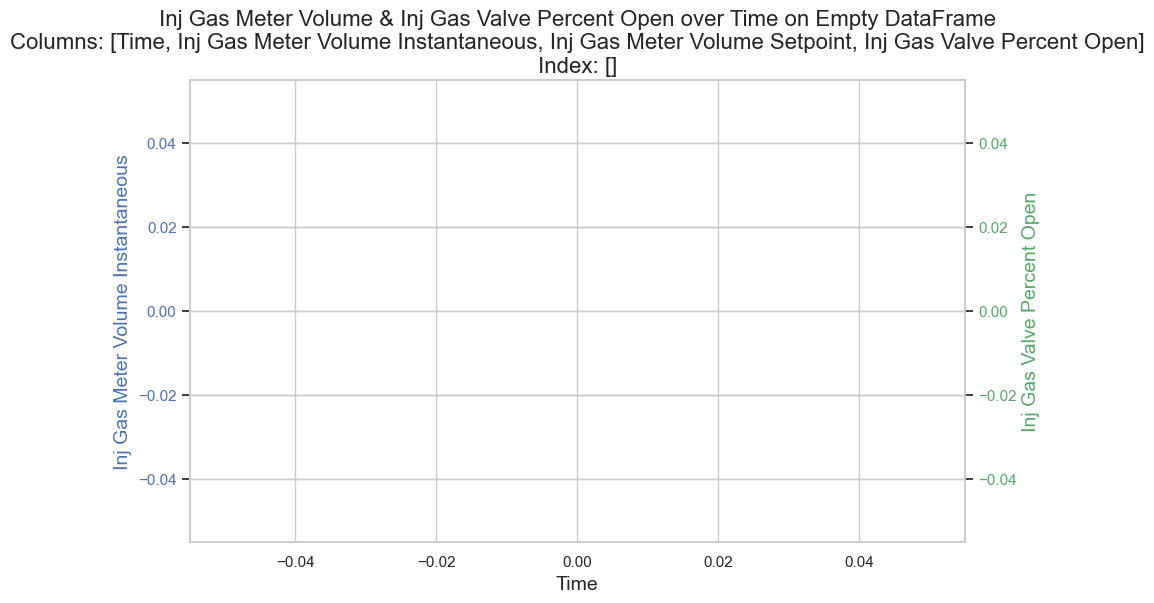

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('bold.csv') # reads csv file

# convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'], format='%m/%d/%Y %I:%M:%S %p')

# filter over a single day: YYYY-MM-DD
day = data[data['Time'].dt.date == pd.to_datetime(input("YYYY-MM-DD?")).date()]

sns.set_theme(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6)) # two axises -- meter volume, percentage

# plots Inj Gas Meter Volume Instantaneous on primary y-axis
sns.lineplot(x='Time', y='Inj Gas Meter Volume Instantaneous', data=day, marker='o', color='b', ax=ax1)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Inj Gas Meter Volume Instantaneous', fontsize=14, color='b')
ax1.tick_params(axis='y', labelcolor='b')

# secondary y-axis for Inj Gas Valve Percent Open
ax2 = ax1.twinx()
sns.lineplot(x='Time', y='Inj Gas Valve Percent Open', data=day, marker='o', color='g', ax=ax2) # ax= ax2
ax2.set_ylabel('Inj Gas Valve Percent Open', fontsize=14, color='g')
ax2.tick_params(axis='y', labelcolor='g')


plt.title(f"Inj Gas Meter Volume & Inj Gas Valve Percent Open over Time on {day}", fontsize=16)
#plt.xticks(rotation=45)
plt.show()


**comparing error**
hypothesis: when the setpoint value is exceeded by x, and the percentage is lower than x, hydrate will form.

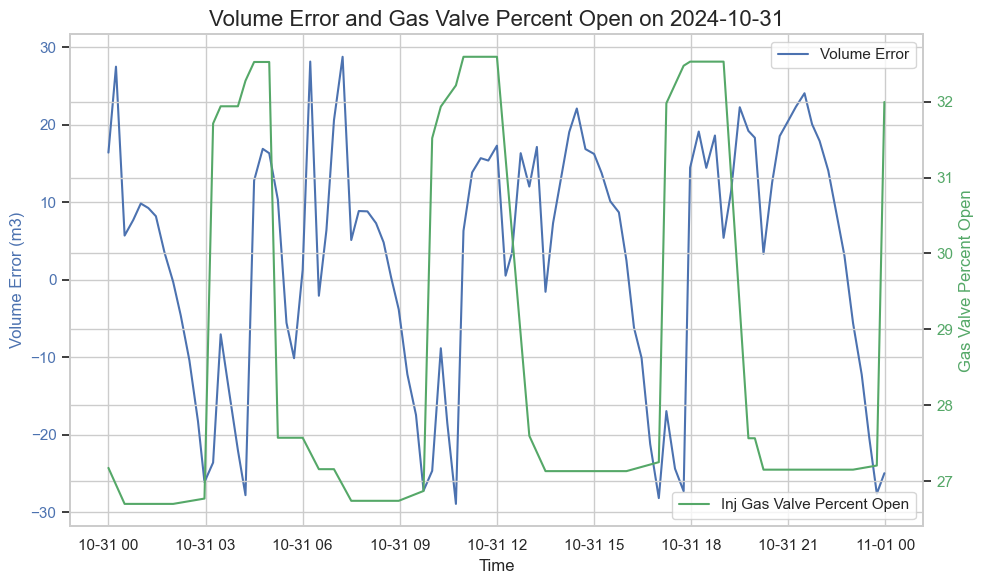

In [54]:
data['Volume Error'] = data['Inj Gas Meter Volume Instantaneous'] - 375.0

# Ensure the 'Time' column is in datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Filter data for a specific day (e.g., October 31, 2024)
specific_day = input('YYYY-MM-DD')
filtered_data = data[data['Time'].dt.date.astype(str) == specific_day]

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create a figure with a larger size
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the volume error on the primary y-axis (ax1)
sns.lineplot(x='Time', y='Volume Error', data=filtered_data, ax=ax1, color='b', label='Volume Error')
ax1.set_xlabel('Time')
ax1.set_ylabel('Volume Error (m3)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for the Inj Gas Valve Percent Open (ax2)
ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis
sns.lineplot(x='Time', y='Inj Gas Valve Percent Open', data=filtered_data, ax=ax2, color='g', label='Inj Gas Valve Percent Open')
ax2.set_ylabel('Gas Valve Percent Open', color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Add titles and labels
plt.title(f'Volume Error and Gas Valve Percent Open on {specific_day}', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
